# Solved tasks 

### What is task?

#### A dataset related to COVID-19 vaccinations is given. Various specific tasks were given to solve in Python. The task details are given below

1) Impute the NA values with the minimum values. If there is no valid daily vaccination number, then impute 0. 


2) Print top 3 countries with the highest medians. 


3) Print the sum of medians on 1/6/2021. 


4) Imputing the missings values in SQL.

In [1]:
#importing libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the dataset

df = pd.read_csv(r'country_vaccination_stats.csv')
df.head(5)

,country,date,daily_vaccinations,vaccines
0,Argentina,12/29/2020,NaN,Sputnik V
1,Argentina,12/30/2020,15656.0,Sputnik V
2,Argentina,12/31/2020,15656.0,Sputnik V
3,Argentina,1/1/2021,11070.0,Sputnik V
4,Argentina,1/2/2021,8776.0,Sputnik V


### Imputing the missing values. 

In [3]:
# printing number of missing values

df.isnull().sum()

country                0
date                   0
daily_vaccinations    60
vaccines               0
dtype: int64

<Figure size 360x360 with 0 Axes>

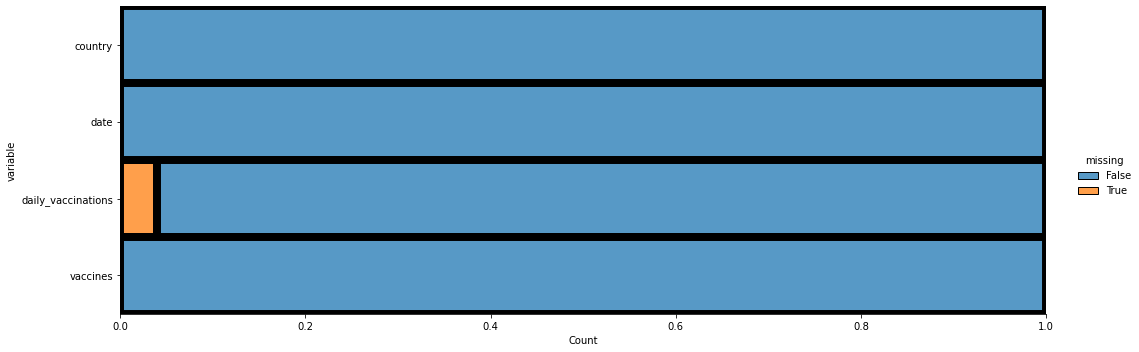

In [4]:
# plotting missing values

plt.figure(figsize=(5,5))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=3
)

In [5]:
# checking missing values

min_daily_vaccinations = df['daily_vaccinations'].min() 

#importing missing values

df_na_imputed = df.fillna(min_daily_vaccinations)

In [6]:
# if the data is invalid, fill with 0 

for i in df_na_imputed['daily_vaccinations']:
    if(type(i) is not float):
        df_na_imputed.fillna(0)
    else: 
        pass

### Printing top 3 medians

In [7]:
# grouping the daily_vaccinations by countries. 
grouped = df_na_imputed['daily_vaccinations'].groupby(df_na_imputed['country']).median()

grouped_df = pd.DataFrame(grouped)
grouped_df = grouped_df.sort_values('daily_vaccinations')

grouped_df.tail(3)

,daily_vaccinations
country,
India,173922.0
China,276786.0
United States,378253.0


### Summing daily vaccination number by date

In [8]:
summ = 0
for i in df_na_imputed['date']:
    for j in df_na_imputed['daily_vaccinations']:
        if(i == '1/6/2021'):
            summ = summ + j
print(summ)

3000487872.0
